### Tarea 2 
### Autor: Javier Abarca Jimenez 
### Carné: B70018
### Dataset: [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) 

## 1. Problema
Con el conjunto de datos *Western Australia Weather 1944-2016* se van a crear dos modelos para poder predecir si al día siguiente va a llover. Este problema es de clasificación binaria.

In [134]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.model_selection import KFold


In [135]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/Jaleab/agvd-21b-javier-abarca/main/tareas/tarea_2/weatherAUS.csv')

## 2. Exploración

In [136]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [137]:
data.shape

(145460, 23)

El conjunto de datos es grande, tiene 145 mil filas y 23 columnas.

In [138]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Tiene 7 atributos categóricos de los 23 que tiene el conjunto.

## Preprocesamiento y limpieza

In [140]:
# Cantidad de elementos unicos
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [141]:
# Eliminacion de nulos
data = data.dropna()
# Chequeo de cantidad de filas
data.shape

(56420, 23)

In [142]:
# Verificacion de la limpieza
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Aproximadamente la mitad de los datos tenían valores nulos.

##  Transformación de datos, selección y extracción de atributos

In [143]:
y = data.RainToday
x = data.drop(['Date', 'Location', 'RainToday', 'RainTomorrow'], axis=1)
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6


In [144]:
def label_encoding(column, dataToEncode):
    label_encoder = preprocessing.LabelEncoder()
 
    dataToEncode[column] = label_encoder.fit_transform(dataToEncode[column].astype(str))
 
    dataToEncode[column].unique()

In [145]:
for column in x.columns:
  if x[column].dtype == object:
    label_encoding(column, x)
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6


### Escalar el dataset

In [146]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [147]:
scaled_data = scaler.transform(x)
print(scaled_data)

[[ 0.69120848  1.57529783 -0.30370205 ...  0.25441126  1.27818584
   1.56362087]
 [ 0.76913098  0.67150378 -0.30370205 ... -1.25660337  0.31897996
   0.62746694]
 [ 0.92497598  1.91960032 -0.30370205 ...  0.63216492  1.59792114
   1.78303195]
 ...
 [ 1.12757448  1.23099533 -0.30370205 ... -1.63435703  1.00412702
   1.37346461]
 [ 0.94056048  1.08753596 -0.30370205 ... -1.25660337  1.00412702
   0.94926986]
 [ 1.04965198  1.07319002 -0.30370205 ...  0.25441126  1.09547996
   1.21256315]]


### Aplicar PCA para reducir dimensionalidad

In [148]:
# Objetivo: La menor cantidad de features con los que se logre una varianza del 95%
pca=PCA(.95)
principalComponents = pca.fit(scaled_data)
x = pca.transform(scaled_data)
x.shape

(56420, 12)

In [149]:
train_x, test_x, train_y, test_y = train_test_split(scaled_data, y, test_size= 0.2)

## Modelos

## Maquina de soporte vectorial

### Parameters


* Valor de C: Es un valor equivalente al castigo al ocurrir una clasificación  errónea, se van a buscar entre los valores 0.1 y 0.3.
* Función kernel: Es la forma de separar los datos, se van buscar entre las funciones poly y sigmoid.
* Gamma: Es un coeficiente utilizado por la función kernel. Se estableció como scale, esto significa que su valor va a ser 1 / n_features.


In [156]:
support_vector_classifier = SVC()
C = [0.1, 0.3]
kernel = ['poly', 'sigmoid']
gamma = ['auto']

### Stratified cross validation para busqueda de hiperparámetros

In [168]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=support_vector_classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x, train_y)

### Mejor combinación

In [159]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# Best: 0.945609 using {'C': 0.3, 'gamma': 'auto', 'kernel': 'poly'}

Best: 0.945609 using {'C': 0.3, 'gamma': 'auto', 'kernel': 'poly'}
0.923579 (0.002887) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
0.841486 (0.007217) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.945609 (0.002742) with: {'C': 0.3, 'gamma': 'auto', 'kernel': 'poly'}
0.838067 (0.006794) with: {'C': 0.3, 'gamma': 'auto', 'kernel': 'sigmoid'}


Se puede observar que las combinaciones con la función kernel 'Sigmoid' tuvieron resultados muy bajos comparados a los obtenidos con al funcion 'poly'. La mejor combinación fue la siguiente:
* C = 0.3
* gamma = auto
* Kernel = poly

### Creación del modelo

In [160]:
svm = SVC(kernel='poly', C=0.3, gamma='auto')

### Evaluación

In [161]:
# k-Fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# Ejecucion del cross validation
scoresSVC = cross_val_score(svm, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

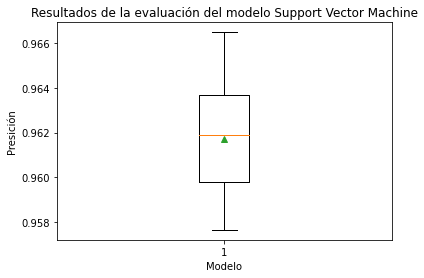

In [162]:
pyplot.boxplot(scoresSVC, showmeans=True)
pyplot.title("Resultados de la evaluación del modelo Support Vector Machine")
pyplot.ylabel("Presición")
pyplot.xlabel("Modelo")
pyplot.show()

## Random Forest

#### Parameters

* n_estimators: Es la cantidad de árboles, se va a buscar entre 40, 100 o 500 arboles.
* max_features: Cantidad de parámetros utilizados. El espacio de búsqueda va a ser entre 2, 6 o 12 atributos.
* max_depth: Profundidad máxima del árbol, se decidió mantener con el valor predeterminado (None).

In [163]:
forest_model = RandomForestClassifier()
n_estimators = [40, 100, 500]
max_features = [2, 6, 12]

### Stratified cross validation para busqueda de hiperparámetros

In [164]:
grid = dict(n_estimators=n_estimators, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=forestModel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x, train_y)

### Mejor combinación

In [101]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# Best: 0.999970 using {'max_features': 2, 'n_estimators': 100}

Best: 0.999970 using {'max_features': 2, 'n_estimators': 100}
0.999941 (0.000118) with: {'max_features': 2, 'n_estimators': 40}
0.999970 (0.000089) with: {'max_features': 2, 'n_estimators': 100}
0.999970 (0.000089) with: {'max_features': 2, 'n_estimators': 500}
0.999970 (0.000089) with: {'max_features': 6, 'n_estimators': 40}
0.999970 (0.000089) with: {'max_features': 6, 'n_estimators': 100}
0.999970 (0.000089) with: {'max_features': 6, 'n_estimators': 500}
0.999970 (0.000089) with: {'max_features': 12, 'n_estimators': 40}
0.999970 (0.000089) with: {'max_features': 12, 'n_estimators': 100}
0.999970 (0.000089) with: {'max_features': 12, 'n_estimators': 500}


Se puede observar que las combinaciones tienen un desempeño similar, sin embargo los valores que se van a utilizar por ser los mejores son:
* max_features = 2
* n_estimators = 100

### Creación del modelo

In [165]:
random_forest_classifier = RandomForestClassifier(random_state=0, max_features=2, n_estimators=100)

### Evaluacion

In [166]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluacion y recoleccion de resultados
scoresRF = cross_val_score(random_forest_classifier, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

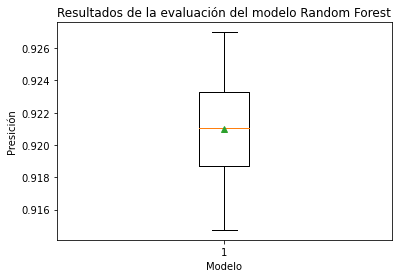

In [167]:
pyplot.boxplot(scoresRF, showmeans=True)
pyplot.title("Resultados de la evaluación del modelo Random Forest")
pyplot.ylabel("Presición")
pyplot.xlabel("Modelo")
pyplot.show()

### Tabla comparativa
| Modelo   |      Tecnica búsqueda      |      Tecnica evaluación      |    Presición      |
|----------|:-------------:|----------|:-------------:|
| Random Forest | Stratified cross validation | Repeated Stratified KFold |  0.921 | 
| Support Vector Machine | Stratified cross validation | k-Fold Cross-Validation |   0.961   |

El modelo de Support Vector Machine fue superior por 4% sobre el otro modelo (Random Forest).